In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")

### Row data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E1.csv".format(root_dir))
data_clean

,subject_id,rt,stimulus,trial_type,gender,age,language,country,sampling,turkcode,nb_of_run,responses,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,NaN,instruction,image-button-response,male,29,English,United States of America,Right,R568084887600gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,instruction,causal-graph1,male,29,English,United States of America,Right,R568084887600gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,instruction,causal-graph1,male,29,English,United States of America,Right,R568084887600gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,instruction,causal-graph1,male,29,English,United States of America,Right,R568084887600gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,instruction,causal-graph1,male,29,English,United States of America,Right,R568084887600gxrw,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,29,10192.050,branch_RTLS,causal-graph1,male,31,ENGLISH,United States of America,Right,R561852717430gxrw,1.0,NaN,AND_Gate,Long,State,Top,NaN,node14
1193,29,13350.605,branch_RTSE3,causal-graph1,male,31,ENGLISH,United States of America,Right,R561852717430gxrw,1.0,NaN,AND_Gate,Short,Event,Top,Long,node14
1194,29,12324.820,branch_RTSE2,causal-graph1,male,31,ENGLISH,United States of America,Right,R561852717430gxrw,1.0,NaN,AND_Gate,Short,Event,Top,Medium,node15
1195,29,NaN,instruction,image-button-response,male,31,ENGLISH,United States of America,Right,R561852717430gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Demographical data only

In [3]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog.head()

,subject_id,gender,age,language,country,turkcode
0,1,male,29,English,United States of America,R568084887600gxrw
1,1,male,29,English,United States of America,R568084887600gxrw
2,1,male,29,English,United States of America,R568084887600gxrw
3,1,male,29,English,United States of America,R568084887600gxrw
4,1,male,29,English,United States of America,R568084887600gxrw


### Target stimuli only (instructions deleted)

In [4]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","length","state_OR_event",
                   "branch_first","time_interval","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,22620.305,chain_RL,Right,1.0,Chain,Long,NaN,NaN,NaN,node7
1,1,23863.120,branch_RTLE1,Right,1.0,AND_Gate,Long,Event,Top,Short,node12
2,1,10390.475,branch_RBSS,Right,1.0,AND_Gate,Short,State,Bottom,NaN,node15
3,1,14482.460,branch_RTSE3,Right,1.0,AND_Gate,Short,Event,Top,Long,node14
4,1,30929.865,branch_RTLE2,Right,1.0,AND_Gate,Long,Event,Top,Medium,node14


### Chain only

In [5]:
data_chain = data[data["stim_type"]=="Chain"].drop(["stim_type","state_OR_event","branch_first","time_interval"],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["length"] = data_chain["length"].astype("category")
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,node_selected
0,1,22620.305,chain_RL,Right,1.0,Long,node7
1,1,30747.455,chain_RM,Right,1.0,Medium,node7
2,1,12595.985,chain_RS,Right,1.0,Short,node8
3,2,46211.535,chain_LL,Left,1.0,Long,node2
4,2,10868.255,chain_LM,Left,1.0,Medium,node2


### AND-Gate only

In [6]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["sampling"] = data_AND_Gate["sampling"].astype("category")
data_AND_Gate["length"] = data_AND_Gate["length"].astype("category")
data_AND_Gate["branch_first"] = data_AND_Gate["branch_first"].astype("category")
data_AND_Gate["time_interval"] = data_AND_Gate["time_interval"].astype("category")
data_AND_Gate.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,node_selected
0,1,23863.120,branch_RTLE1,Right,1.0,Long,Event,Top,Short,node12
1,1,10390.475,branch_RBSS,Right,1.0,Short,State,Bottom,NaN,node15
2,1,14482.460,branch_RTSE3,Right,1.0,Short,Event,Top,Long,node14
3,1,30929.865,branch_RTLE2,Right,1.0,Long,Event,Top,Medium,node14
4,1,15376.405,branch_RBME1,Right,1.0,Medium,Event,Bottom,Short,node14


### General functions

In [7]:
def chain_node_cat(length,node):
    node =  int(node[-1])
    short = {'INACT':[1,2,3,4,5,6],'ROIMDT':[7],'EFFECT':[8]}
    medium = {'INACT':[1,2,3,4],'ROOT':[5],'INBTW':[6],'IMDT':[7],'EFFECT':[8]}
    long = {'INACT':[1,2],'ROOT':[3],'INBTW':[4,5,6],'IMDT':[7],'EFFECT':[8]}
    category = [cat for cat,nd in (short if length == 'Short' else medium if length == 'Medium' 
                                   else long).items() if node in nd][0]
    
    return category

def branch_node_cat(length,node,first):
    node = int(node[-1]) if len(node) == 5 else int(node[-2:])
    short_top = {'INACT_1st':[1,2,3,4,5,6],'INACT_2nd':[8,9,10,11,12,13],'ROOIMDT_1st':[7],'ROOIMDT_2nd':[14],'EFFECT':[15]}
    short_bot = {'INACT_1st':[8,9,10,11,12,13],'INACT_2nd':[1,2,3,4,5,6],'ROOIMDT_1st':[14],'ROOIMDT_2nd':[7],'EFFECT':[15]}
    medium_top = {'INACT_1st':[1,2,3,4],'INACT_2nd':[8,9,10,11],'ROOT_1st':[5],'ROOT_2nd':[12],'INBTW_1st':[6],'INBTW_2nd':[13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    medium_bot = {'INACT_1st':[8,9,10,11],'INACT_2nd':[1,2,3,4],'ROOT_1st':[12],'ROOT_2nd':[5],'INBTW_1st':[13],'INBTW_2nd':[6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    long_top = {'INACT_1st':[1,2],'INACT_2nd':[8,9],'ROOT_1st':[3],'ROOT_2nd':[10],'INBTW_1st':[4,5,6],'INBTW_2nd':[11,12,13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    long_bot = {'INACT_1st':[8,9],'INACT_2nd':[1,2],'ROOT_1st':[10],'ROOT_2nd':[3],'INBTW_1st':[11,12,13],'INBTW_2nd':[4,5,6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    if length == 'Short':
        category = [cat for cat,nd in (short_top if first == 'Top' else short_bot).items() if node in nd][0]
    elif length == 'Medium':
        category = [cat for cat,nd in (medium_top if first == 'Top' else medium_bot).items() if node in nd][0]
    elif length == 'Long':
        category = [cat for cat,nd in (long_top if first == 'Top' else long_bot).items() if node in nd][0]
    
    return category

class AndGate(object):

    def __init__(self,length=None):
        if length == "short":
            data = data_AND_Gate[data_AND_Gate["length"]=="Short"]
        elif length == "medium":
            data = data_AND_Gate[data_AND_Gate["length"]=="Medium"]
        elif length == "long":
            data = data_AND_Gate[data_AND_Gate["length"]=="Long"]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(15)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'short':
            cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        else:
            cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None,level=None,delay=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["branch_first"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["branch_first"]=="Bottom"]
        if delay == "short":
            self.df = self.df[self.df["time_interval"]=="Short"]
        elif delay == "medium":
            self.df = self.df[self.df["time_interval"]=="Medium"]
        elif delay == "long":
            self.df = self.df[self.df["time_interval"]=="Long"]
        elif delay == False:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(15)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'Short':
            cats = ['INACT_1st','INACT_2nd','ROOIMDT_1st','ROOIMDT_2nd','EFFECT']
        else:
            cats = ['INACT_1st','INACT_2nd','ROOT_1st','ROOT_2nd','INBTW_1st','INBTW_2nd','IMDT_1st','IMDT_2nd','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
class Chain(object):
    def __init__(self,length=None):
        if length == "short":
            data = data_chain[data_chain["length"]=="Short"]
        elif length == "medium":
            data = data_chain[data_chain["length"]=="Medium"]
        elif length == "long":
            data = data_chain[data_chain["length"]=="Long"]
            
        self.df = data
        
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(8)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'short':
            cats = ['INACT','ROIMDT','EFFECT']
        else:
            cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
    def add_filter(self,sampling=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
            
        self.node_select = self.df["node_selected"].value_counts(normalize=True)*100
        values = {}
        nodes = ["node"+str(i+1) for i in range(8)]
        for item in nodes:
            if item not in self.node_select.keys():
                values[item] = 0
            else:
                values[item] = self.node_select[item]
        self.node_select = pd.Series(values)
        
        length = self.df['length'].cat.remove_unused_categories().cat.categories[0]
        self.node_category = self.df["node_category"].value_counts(normalize=True)*100
        values = {}
        if length == 'Short':
            cats = ['INACT','ROIMDT','EFFECT']
        else:
            cats = ['INACT','ROOT','INBTW','IMDT','EFFECT']
        for item in cats:
            if item not in self.node_category.keys():
                values[item] = 0
            else:
                values[item] = self.node_category[item]
        self.node_category = pd.Series(values)
        
        return self
    
def graph(list_of_data,title,x_axis='node_category'):
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,110])
        axis.set_xlabel("Detectors",labelpad=20)
        axis.set_ylabel("Percentage of responses")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        if x_axis == 'node_selected':
            x.node_select.plot.bar(ax=axis)  
        elif x_axis == 'node_category':
            x.node_category.plot.bar(ax=axis)

In [8]:
data_chain['node_category'] = data_chain.apply(lambda x: chain_node_cat(x['length'],x['node_selected']),axis=1)
data_chain['node_category'] = data_chain['node_category'].astype('category')
data_AND_Gate['node_category'] = data_AND_Gate.apply(lambda x: branch_node_cat(x['length'],x['node_selected'],
                                                                               x['branch_first']),axis=1)
data_AND_Gate['node_category'] = data_AND_Gate['node_category'].astype('category')

### Comparison Right *vs* Left

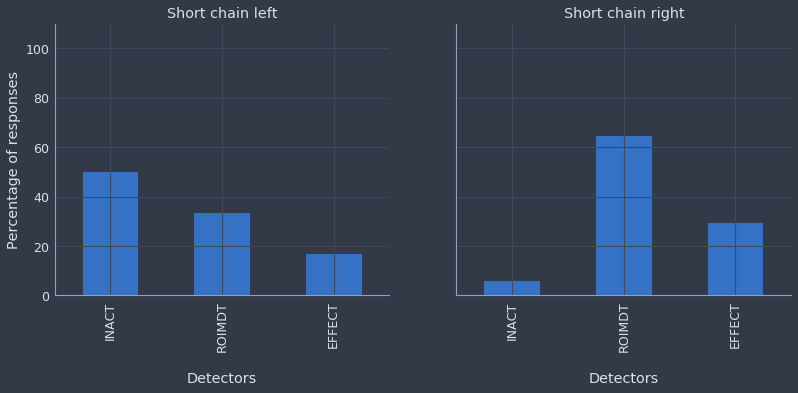

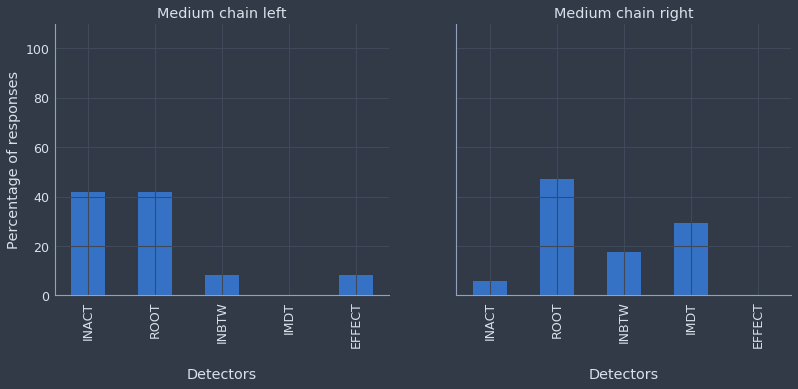

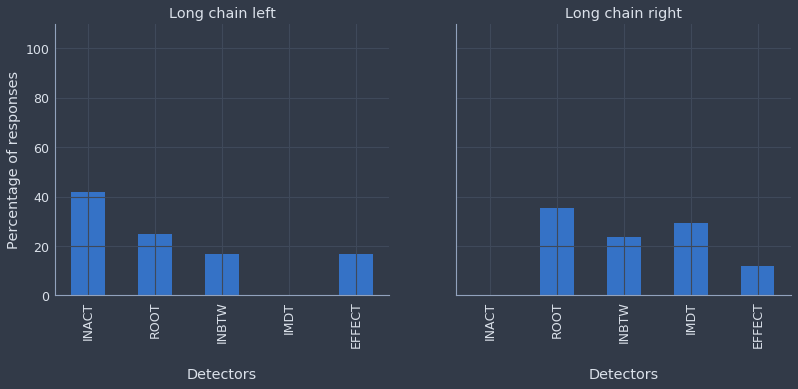

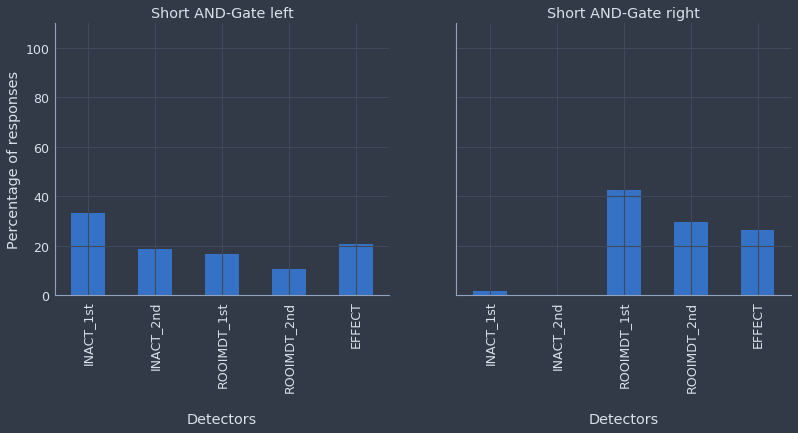

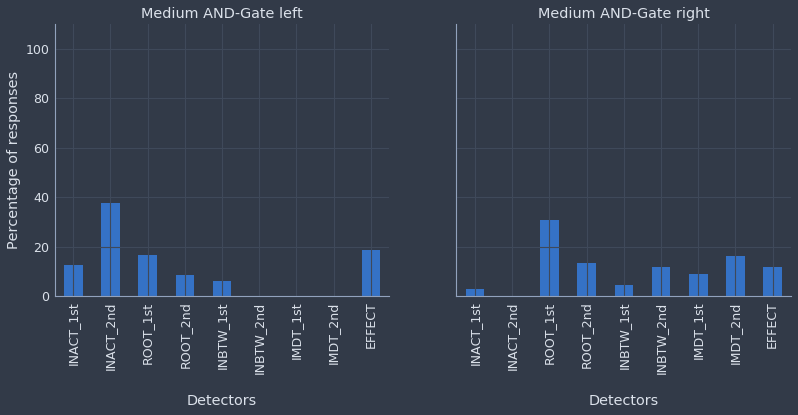

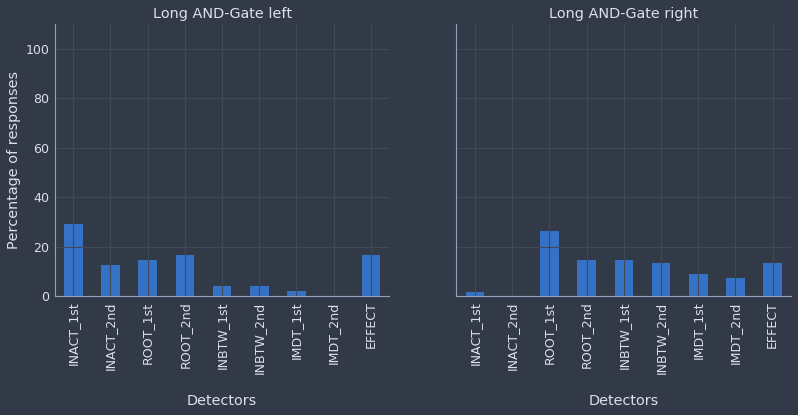

In [9]:
ChainShort_R = Chain("short").add_filter(sampling="right")
ChainMedium_R = Chain("medium").add_filter(sampling="right")
ChainLong_R = Chain("long").add_filter(sampling="right")
ChainShort_L = Chain("short").add_filter(sampling="left")
ChainMedium_L = Chain("medium").add_filter(sampling="left")
ChainLong_L = Chain("long").add_filter(sampling="left")
BranchShort_R = AndGate("short").add_filter(sampling="right")
BranchMedium_R = AndGate("medium").add_filter(sampling="right")
BranchLong_R = AndGate("long").add_filter(sampling="right")
BranchShort_L = AndGate("short").add_filter(sampling="left")
BranchMedium_L = AndGate("medium").add_filter(sampling="left")
BranchLong_L = AndGate("long").add_filter(sampling="left")

graph([ChainShort_L,ChainShort_R],["Short chain left","Short chain right"])
graph([ChainMedium_L,ChainMedium_R],["Medium chain left","Medium chain right"])
graph([ChainLong_L,ChainLong_R],["Long chain left","Long chain right"])
graph([BranchShort_L,BranchShort_R],["Short AND-Gate left","Short AND-Gate right"])
graph([BranchMedium_L,BranchMedium_R],["Medium AND-Gate left","Medium AND-Gate right"])
graph([BranchLong_L,BranchLong_R],["Long AND-Gate left","Long AND-Gate right"])

### Comparison Top *vs* Bottom

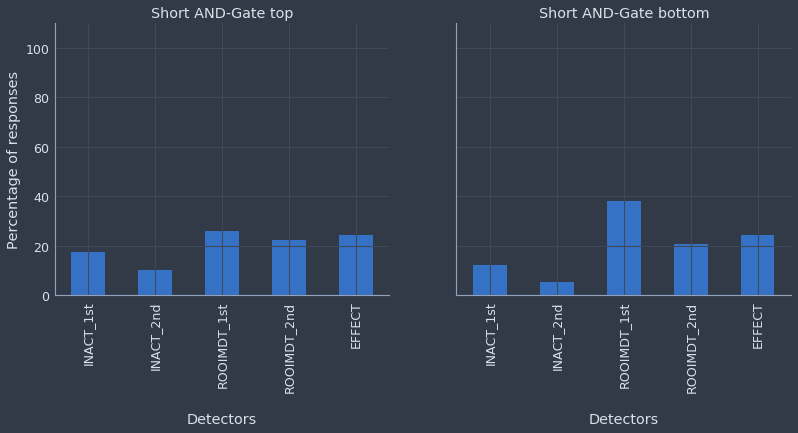

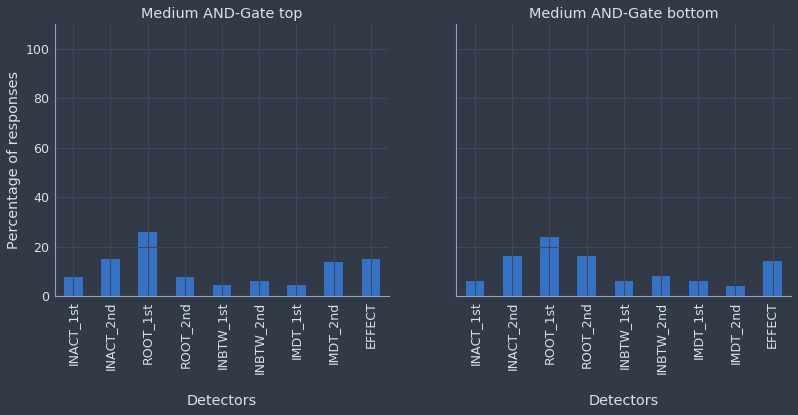

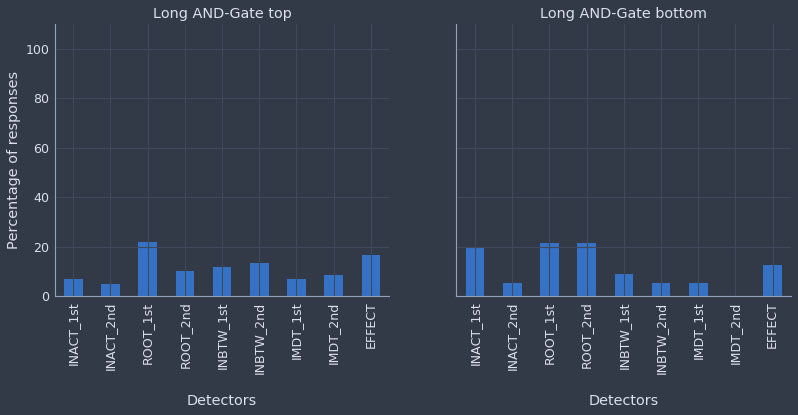

In [10]:
BranchShort_T = AndGate("short").add_filter(level="top")
BranchMedium_T = AndGate("medium").add_filter(level="top")
BranchLong_T = AndGate("long").add_filter(level="top")
BranchShort_B = AndGate("short").add_filter(level="bottom")
BranchMedium_B = AndGate("medium").add_filter(level="bottom")
BranchLong_B = AndGate("long").add_filter(level="bottom")

graph([BranchShort_T,BranchShort_B],["Short AND-Gate top","Short AND-Gate bottom"])
graph([BranchMedium_T,BranchMedium_B],["Medium AND-Gate top","Medium AND-Gate bottom"])
graph([BranchLong_T,BranchLong_B],["Long AND-Gate top","Long AND-Gate bottom"])

### General comparison

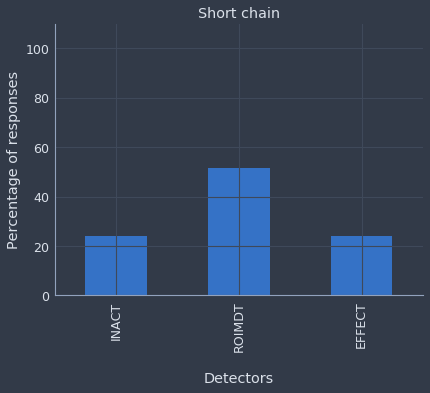

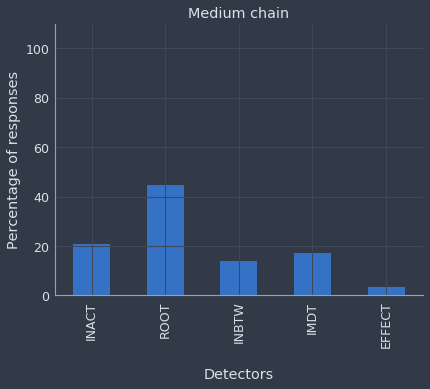

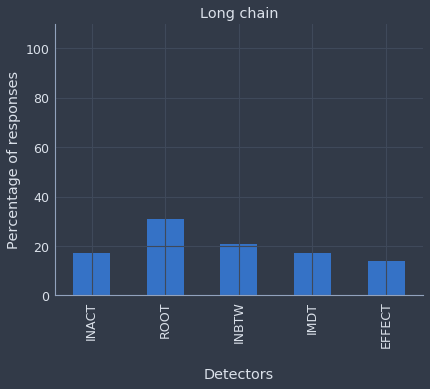

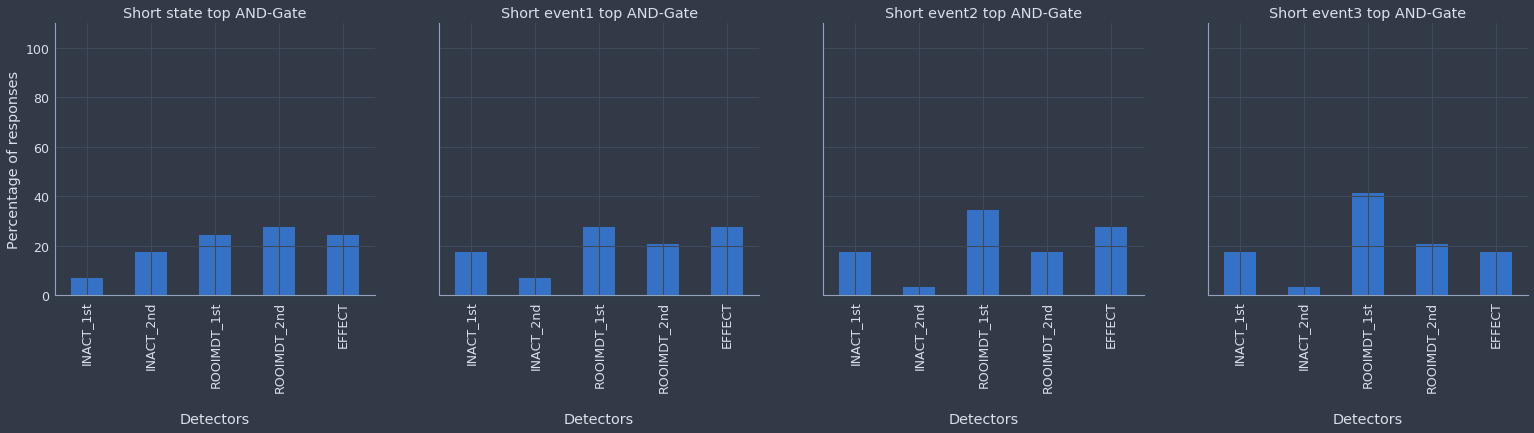

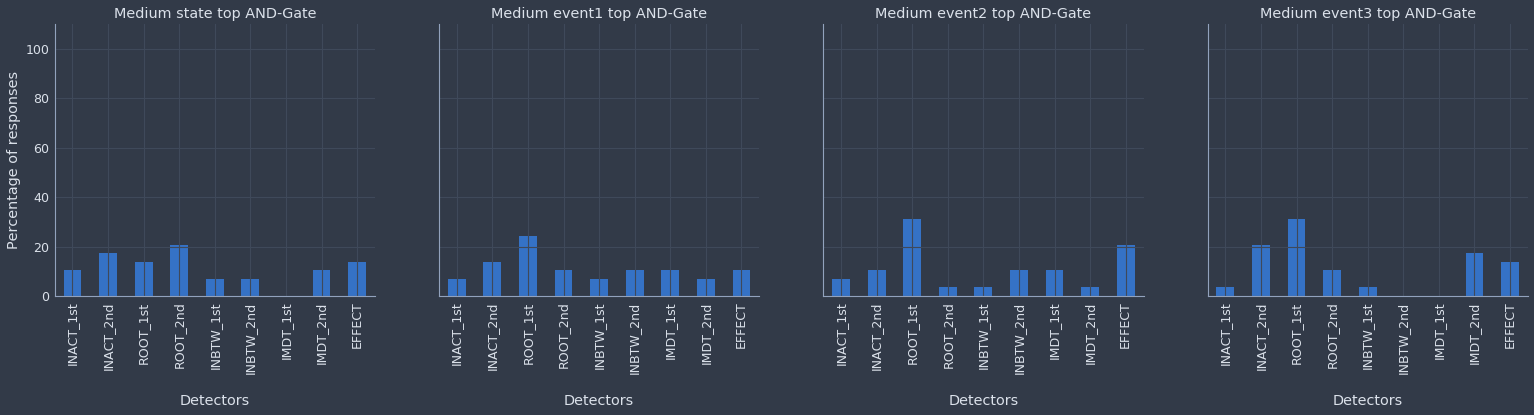

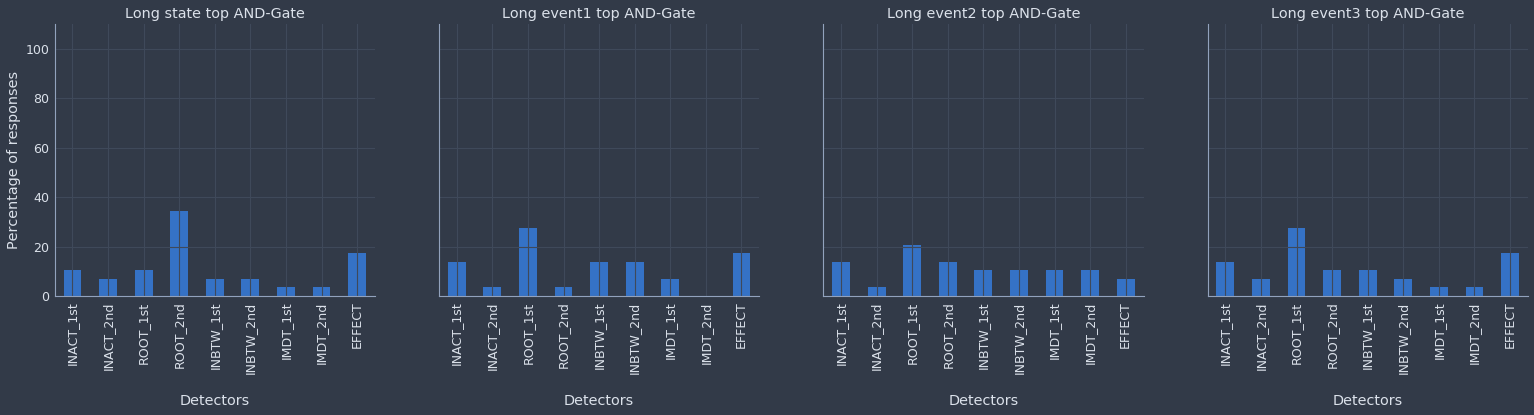

In [11]:
ChainShort = Chain("short").add_filter()
ChainMedium = Chain("medium").add_filter()
ChainLong = Chain("long").add_filter()
ShortState = AndGate("short").add_filter(delay=False)
MediumState = AndGate("medium").add_filter(delay=False)
LongState = AndGate("long").add_filter(delay=False)
ShortEvent1 = AndGate("short").add_filter(delay="short")
ShortEvent2 = AndGate("short").add_filter(delay="medium")
ShortEvent3 = AndGate("short").add_filter(delay="long")
MediumEvent1 = AndGate("medium").add_filter(delay="short")
MediumEvent2  = AndGate("medium").add_filter(delay="medium")
MediumEvent3 = AndGate("medium").add_filter(delay="long")
LongEvent1 = AndGate("long").add_filter(delay="short")
LongEvent2  = AndGate("long").add_filter(delay="medium")
LongEvent3 = AndGate("long").add_filter(delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

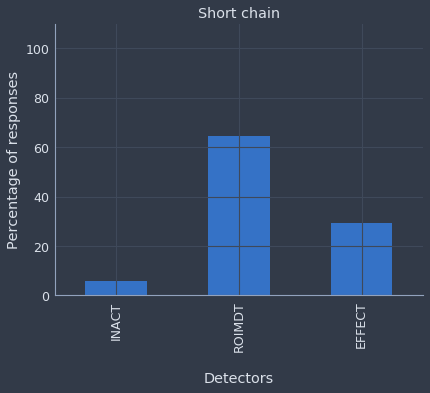

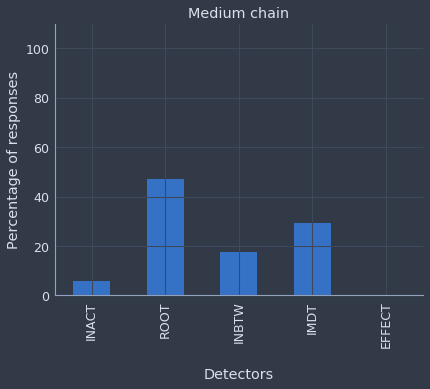

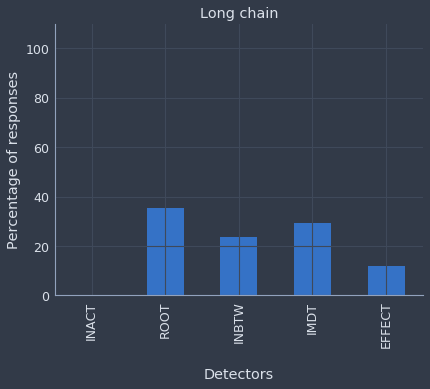

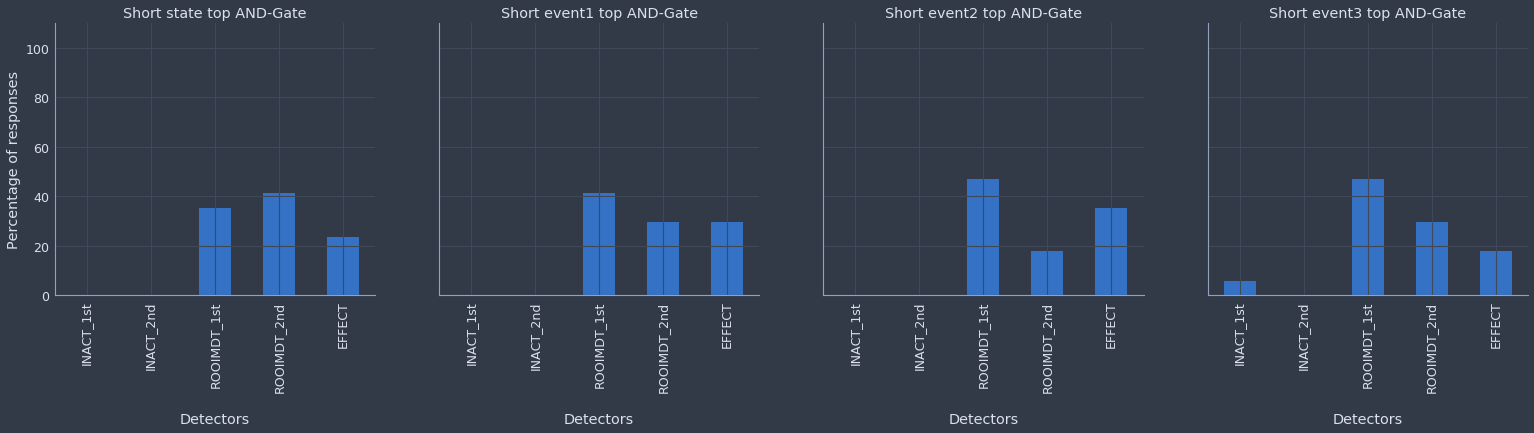

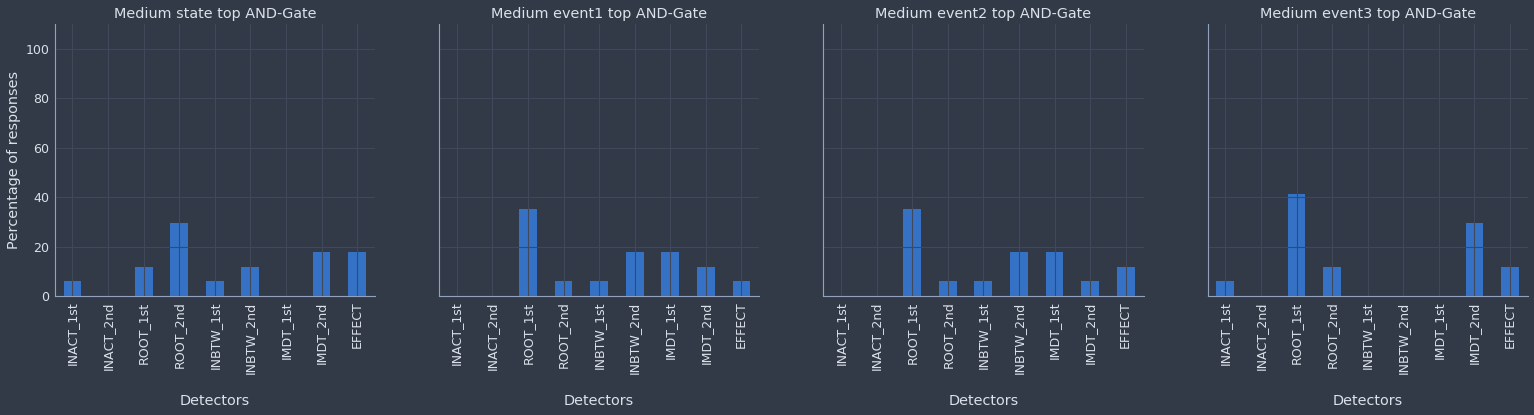

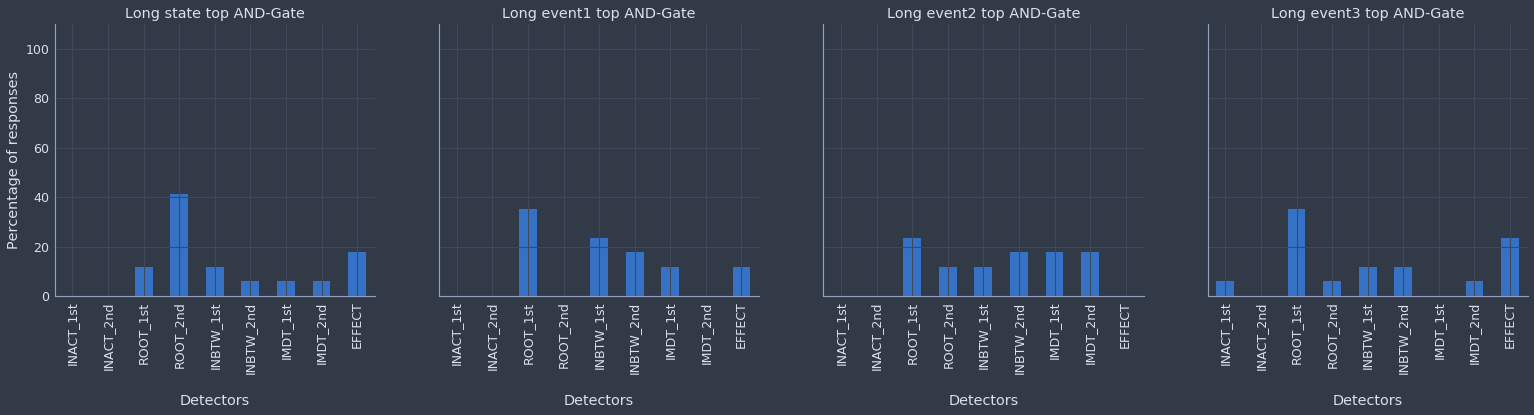

In [12]:
ChainShort = Chain("short").add_filter(sampling='right')
ChainMedium = Chain("medium").add_filter(sampling='right')
ChainLong = Chain("long").add_filter(sampling='right')
ShortState = AndGate("short").add_filter(sampling='right',delay=False)
MediumState = AndGate("medium").add_filter(sampling='right',delay=False)
LongState = AndGate("long").add_filter(sampling='right',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='right',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='right',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='right',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='right',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='right',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='right',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='right',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='right',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='right',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

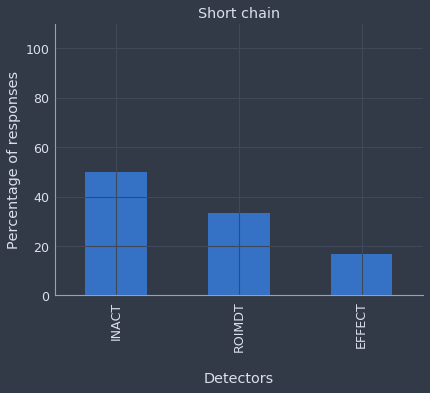

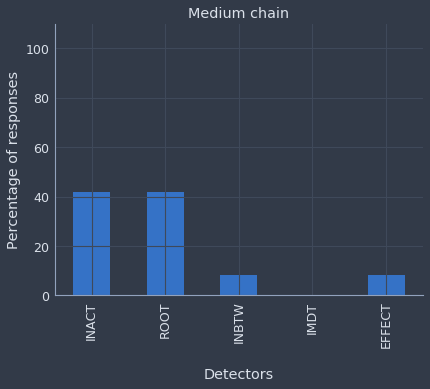

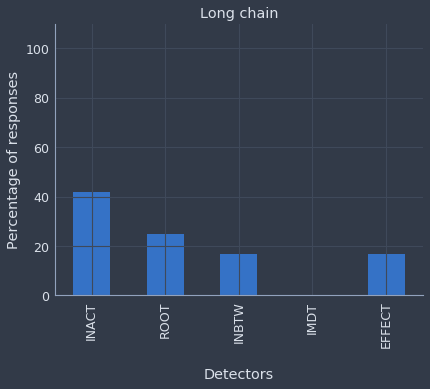

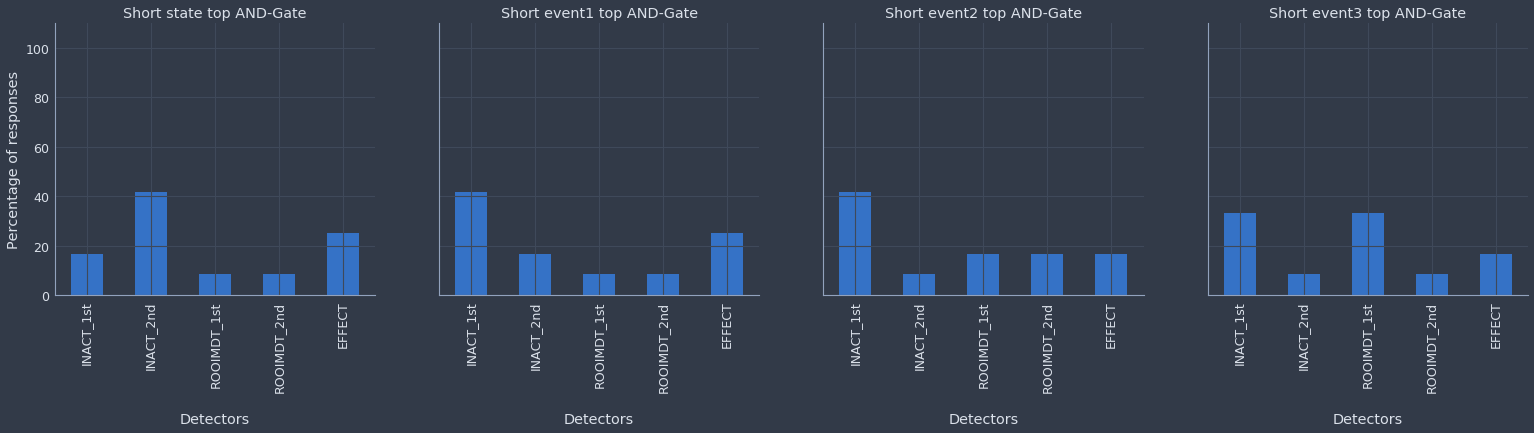

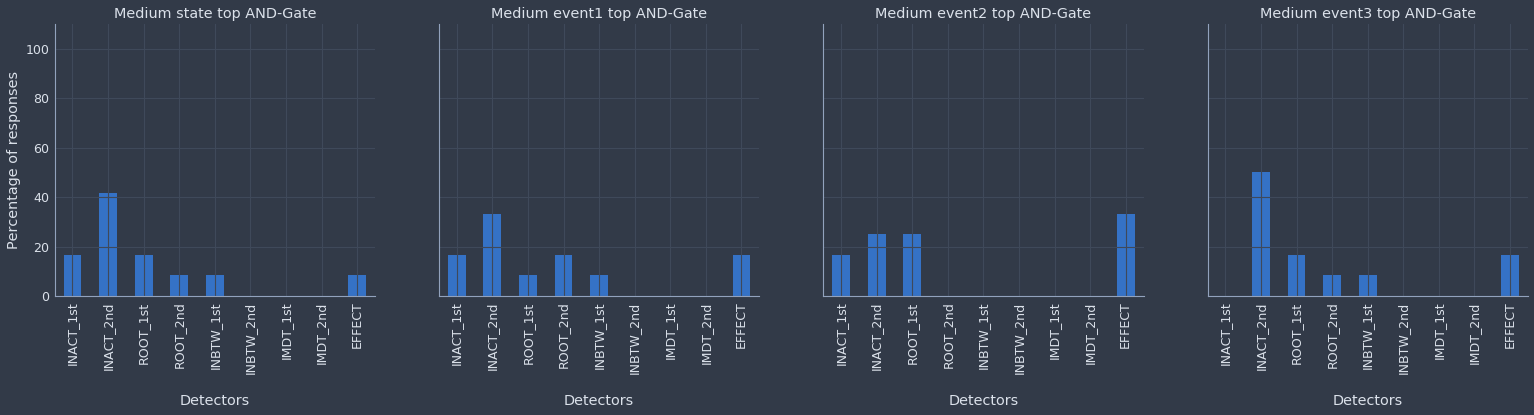

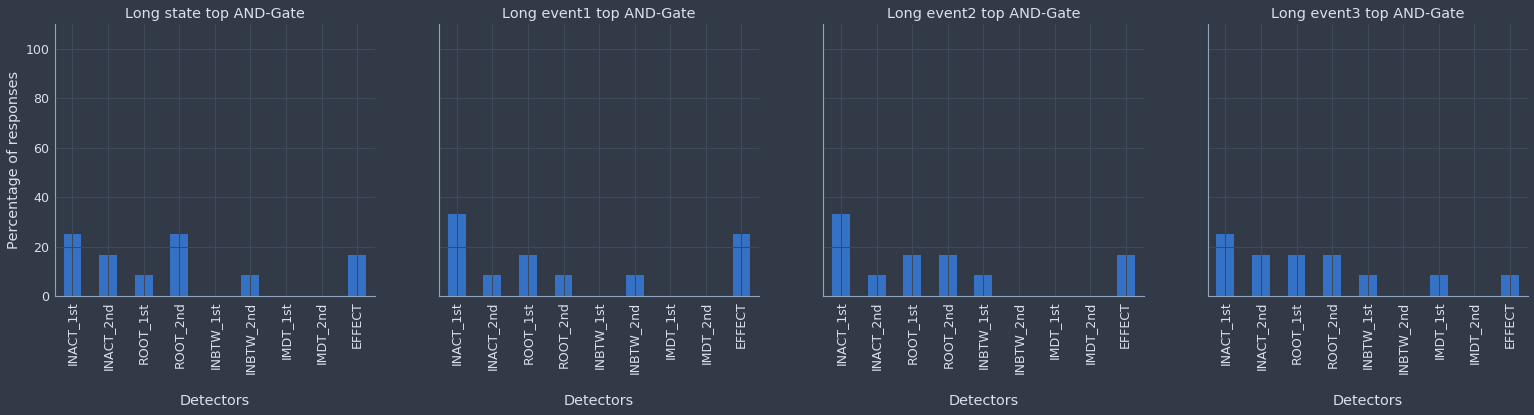

In [13]:
ChainShort = Chain("short").add_filter(sampling='left')
ChainMedium = Chain("medium").add_filter(sampling='left')
ChainLong = Chain("long").add_filter(sampling='left')
ShortState = AndGate("short").add_filter(sampling='left',delay=False)
MediumState = AndGate("medium").add_filter(sampling='left',delay=False)
LongState = AndGate("long").add_filter(sampling='left',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='left',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='left',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='left',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='left',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='left',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='left',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='left',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='left',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='left',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

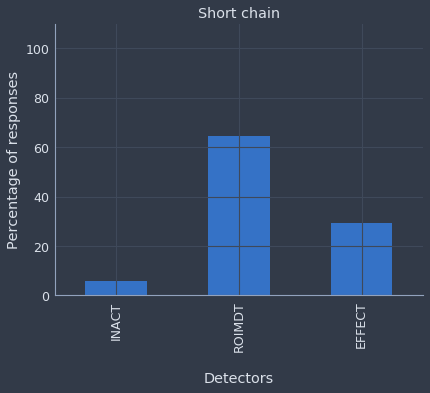

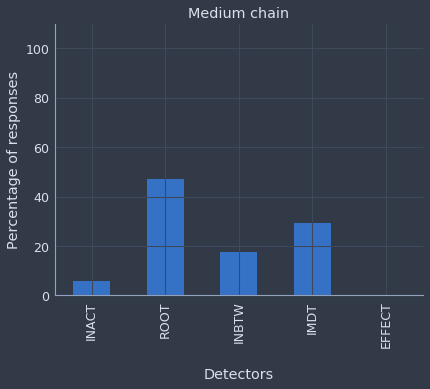

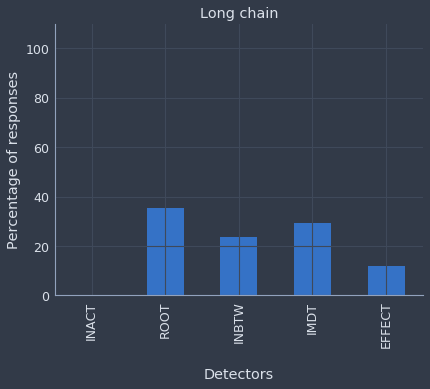

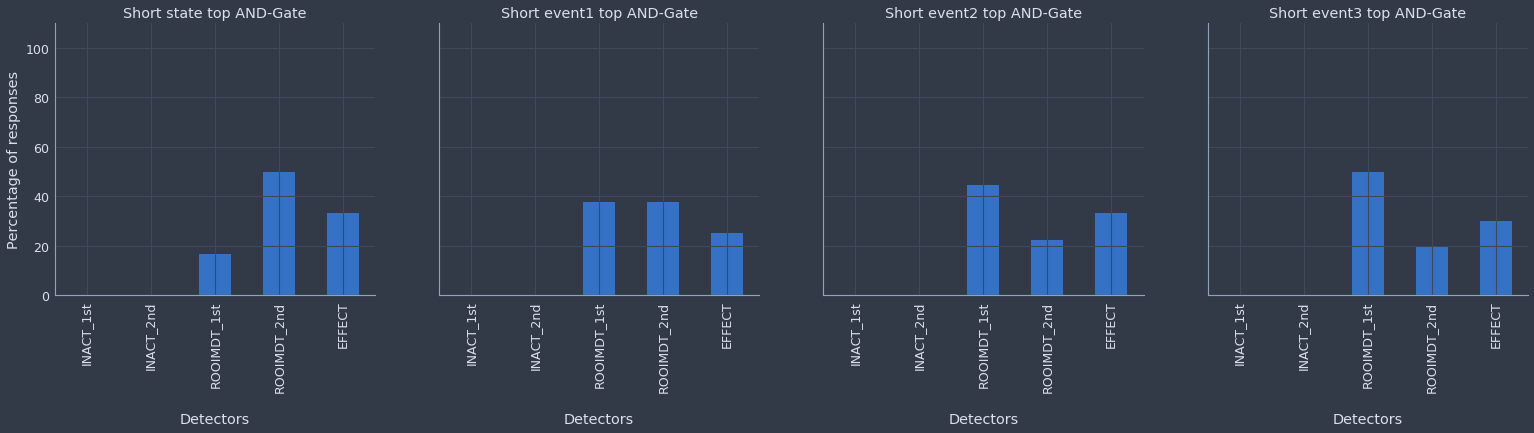

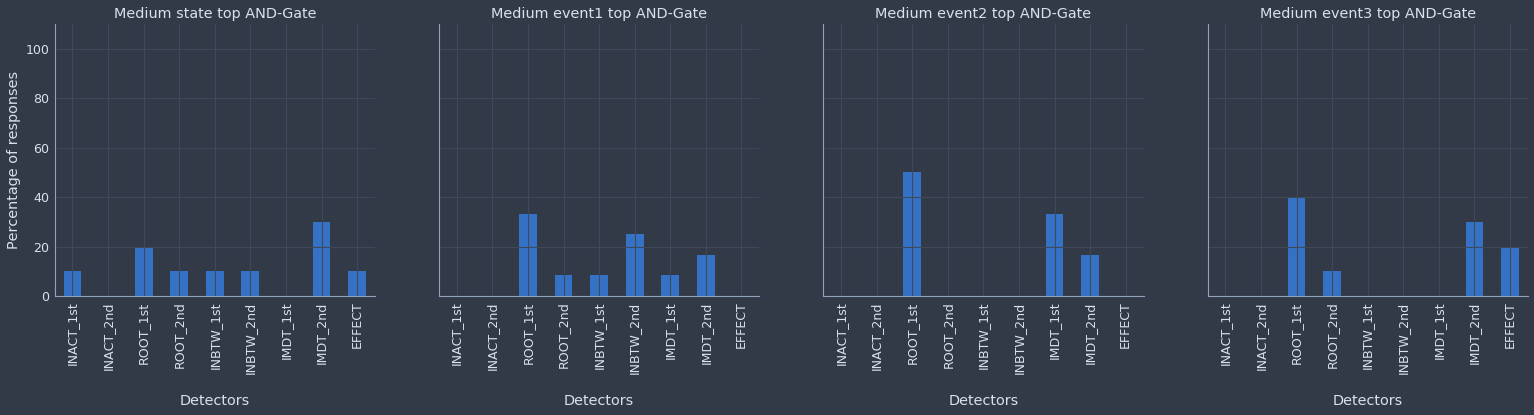

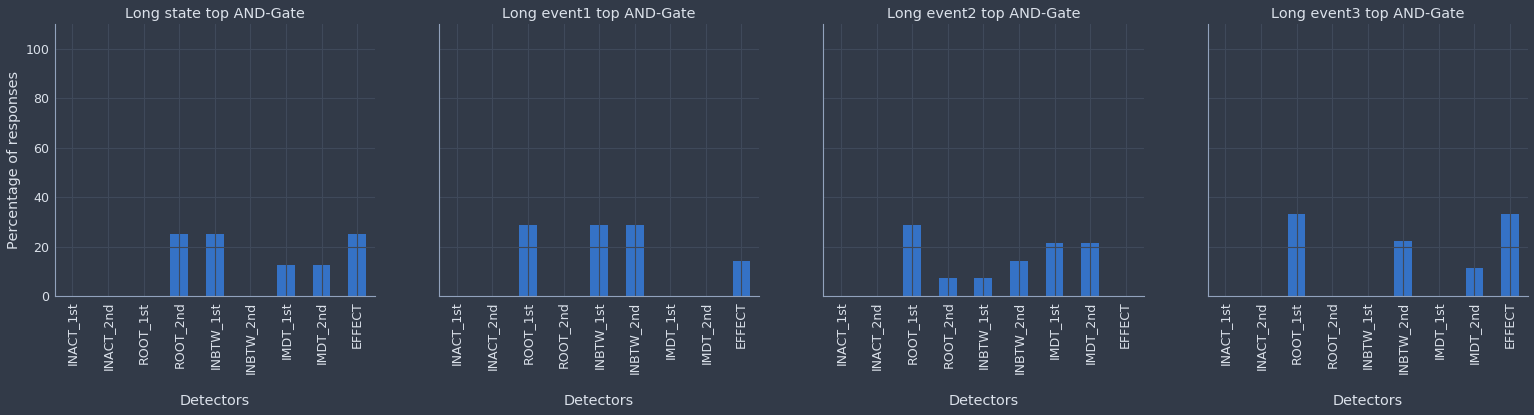

In [14]:
ChainShort = Chain("short").add_filter(sampling='right')
ChainMedium = Chain("medium").add_filter(sampling='right')
ChainLong = Chain("long").add_filter(sampling='right')
ShortState = AndGate("short").add_filter(sampling='right',level='top',delay=False)
MediumState = AndGate("medium").add_filter(sampling='right',level='top',delay=False)
LongState = AndGate("long").add_filter(sampling='right',level='top',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='right',level='top',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='right',level='top',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='right',level='top',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='right',level='top',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='right',level='top',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='right',level='top',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='right',level='top',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='right',level='top',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='right',level='top',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])

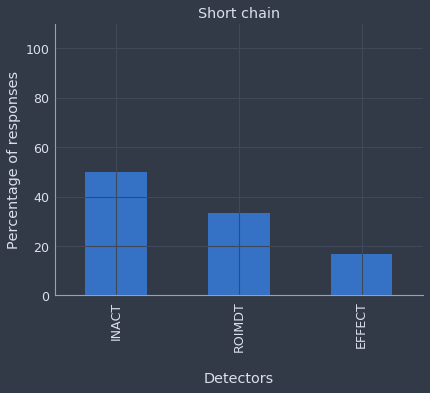

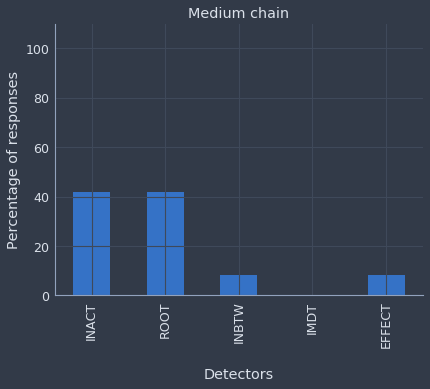

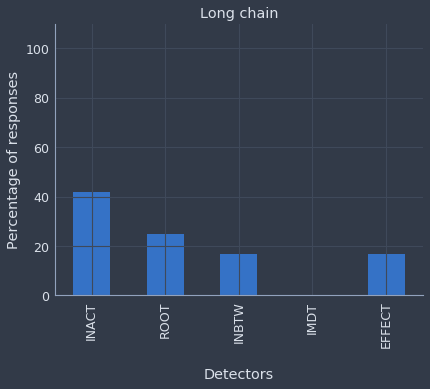

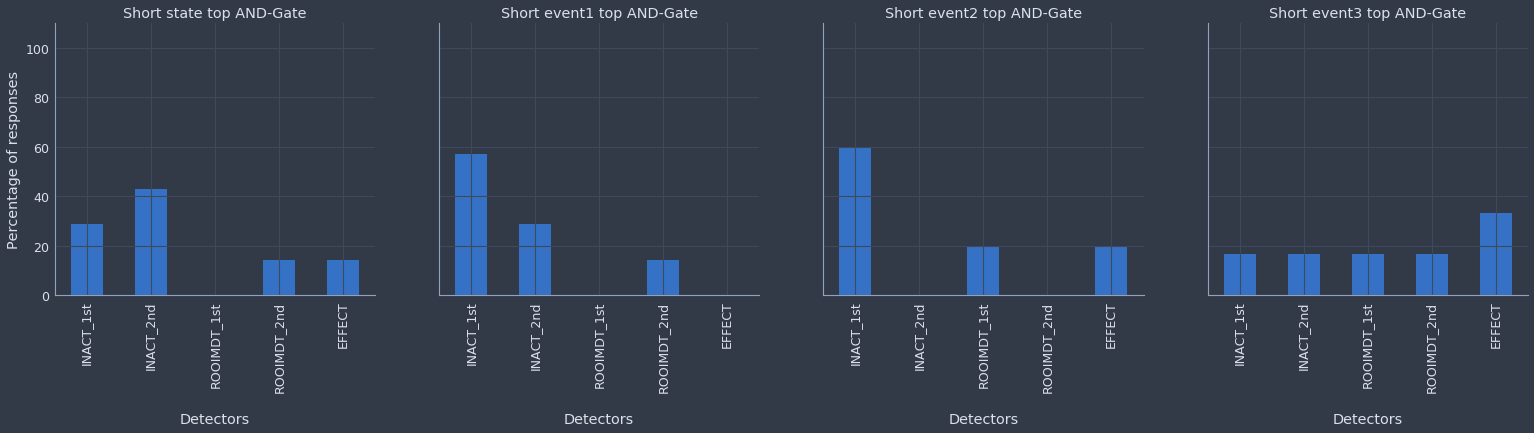

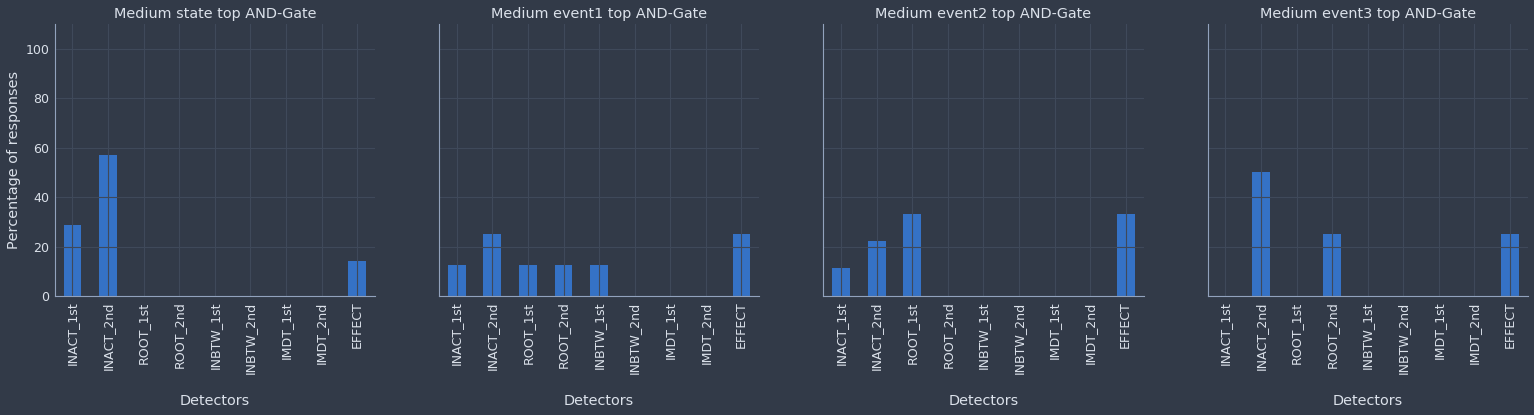

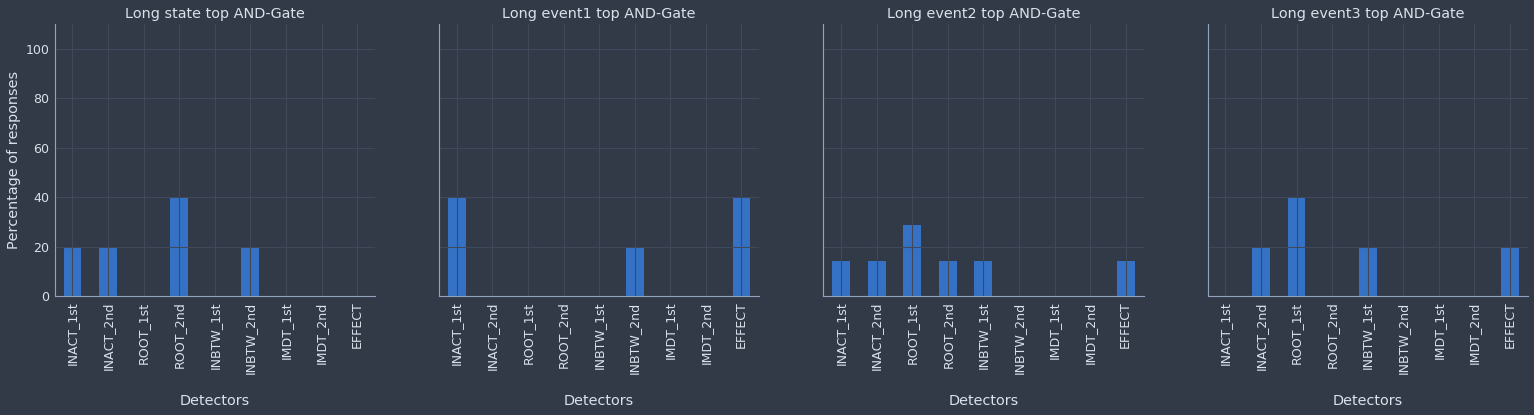

In [15]:
ChainShort = Chain("short").add_filter(sampling='left')
ChainMedium = Chain("medium").add_filter(sampling='left')
ChainLong = Chain("long").add_filter(sampling='left')
ShortState = AndGate("short").add_filter(sampling='left',level='top',delay=False)
MediumState = AndGate("medium").add_filter(sampling='left',level='top',delay=False)
LongState = AndGate("long").add_filter(sampling='left',level='top',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='left',level='top',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='left',level='top',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='left',level='top',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='left',level='top',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='left',level='top',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='left',level='top',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='left',level='top',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='left',level='top',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='left',level='top',delay="long")

graph([ChainShort],["Short chain"])
graph([ChainMedium],["Medium chain"])
graph([ChainLong],["Long chain"])
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],["Short state top AND-Gate","Short event1 top AND-Gate",
                                                        "Short event2 top AND-Gate","Short event3 top AND-Gate"])
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],["Medium state top AND-Gate","Medium event1 top AND-Gate",
                                                        "Medium event2 top AND-Gate","Medium event3 top AND-Gate"])
graph([LongState,LongEvent1,LongEvent2,LongEvent3],["Long state top AND-Gate","Long event1 top AND-Gate",
                                                        "Long event2 top AND-Gate","Long event3 top AND-Gate"])